Libraries

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [6]:
path = 'hcvdat0.csv'
df = pd.read_csv(path)
print(df.head())

   0       Category  Age Sex   ALB   ALP   ALT   AST   BIL    CHE  CHOL  \
0  1  0=Blood Donor   32   m  38.5  52.5   7.7  22.1   7.5   6.93  3.23   
1  2  0=Blood Donor   32   m  38.5  70.3  18.0  24.7   3.9  11.17  4.80   
2  3  0=Blood Donor   32   m  46.9  74.7  36.2  52.6   6.1   8.84  5.20   
3  4  0=Blood Donor   32   m  43.2  52.0  30.6  22.6  18.9   7.33  4.74   
4  5  0=Blood Donor   32   m  39.2  74.1  32.6  24.8   9.6   9.15  4.32   

    CREA   GGT  PROT  
0  106.0  12.1  69.0  
1   74.0  15.6  76.5  
2   86.0  33.2  79.3  
3   80.0  33.8  75.7  
4   76.0  29.9  68.7  


Veri Türleri

In [7]:
df.dtypes

0             int64
Category     object
Age           int64
Sex          object
ALB         float64
ALP         float64
ALT         float64
AST         float64
BIL         float64
CHE         float64
CHOL        float64
CREA        float64
GGT         float64
PROT        float64
dtype: object

Genel istatistikler

In [8]:
df.describe()

,0,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,308.000000,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,177.679487,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,1.000000,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,154.500000,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,308.000000,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,461.500000,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,615.000000,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


Eksik değerlerin kontrolü 

In [9]:
df.isnull().sum()

0            0
Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

ALB, ALT, PROT sütunlarında 1 eksik değer var.
ALP sütununda 18 eksik değer var.
CHOL sütununda 10 eksik değer var.

Eksik değerler ortalama ile doldurulmaktadır.

In [10]:
# Sayısal sütunlarda eksik değerleri sütun ortalaması ile doldur
df_filled = df.fillna(df.mean(numeric_only=True))

# Eksik değerlerin kontrolü (doldurma sonrası)
print(df_filled.isnull().sum())

0           0
Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64


In [11]:
df_eski = df

In [12]:
df = df_filled

Isı haritası: Hangi değişkenler birbiriyle güçlü veya zayıf ilişkili?

Pairplot: Değişken çiftleri arasındaki dağılımlar ve gruplar arası ayırıcı desenler.

Boxplot: Hangi değişkenler kategorilere göre anlamlı farklılık gösteriyor?

In [13]:
print(df.dtypes)

0             int64
Category     object
Age           int64
Sex          object
ALB         float64
ALP         float64
ALT         float64
AST         float64
BIL         float64
CHE         float64
CHOL        float64
CREA        float64
GGT         float64
PROT        float64
dtype: object


Eksik değerler temizlendi.

In [14]:
df.head()

,0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [15]:
df.head() #m=1 ve f=0

,0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [16]:
df['AST_ALT_Ratio'] = df['AST'] / df['ALT']
df['AST_ALT_Ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)
df['AST_ALT_Ratio'].fillna(0, inplace=True)  # inf veya bölme hatası varsa sıfırla

/tmp/ipykernel_243899/3840911584.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['AST_ALT_Ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)
/tmp/ipykernel_243899/3840911584.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

In [17]:
df.head()

,0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,AST_ALT_Ratio
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,2.870130
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,1.372222
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,1.453039
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0.738562
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0.760736


In [18]:
selected_features = ['ALB', 'AST', 'ALP','BIL', 'Age', 'AST_ALT_Ratio']
X = df[selected_features]
y = df['Category']  # hedef sütun

In [19]:
# SMOTE kullanarak dengesizliği düzeltme
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
# Eğitim ve test bölmesi
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Random Forest modeli
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Tahmin ve rapor
y_pred = rf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[110   1   0   2   0]
 [  0 116   0   0   0]
 [  0   0  99   1   0]
 [  0   0   0 107   0]
 [  0   0   0   1  96]]
                        precision    recall  f1-score   support

         0=Blood Donor       1.00      0.97      0.99       113
0s=suspect Blood Donor       0.99      1.00      1.00       116
           1=Hepatitis       1.00      0.99      0.99       100
            2=Fibrosis       0.96      1.00      0.98       107
           3=Cirrhosis       1.00      0.99      0.99        97

              accuracy                           0.99       533
             macro avg       0.99      0.99      0.99       533
          weighted avg       0.99      0.99      0.99       533



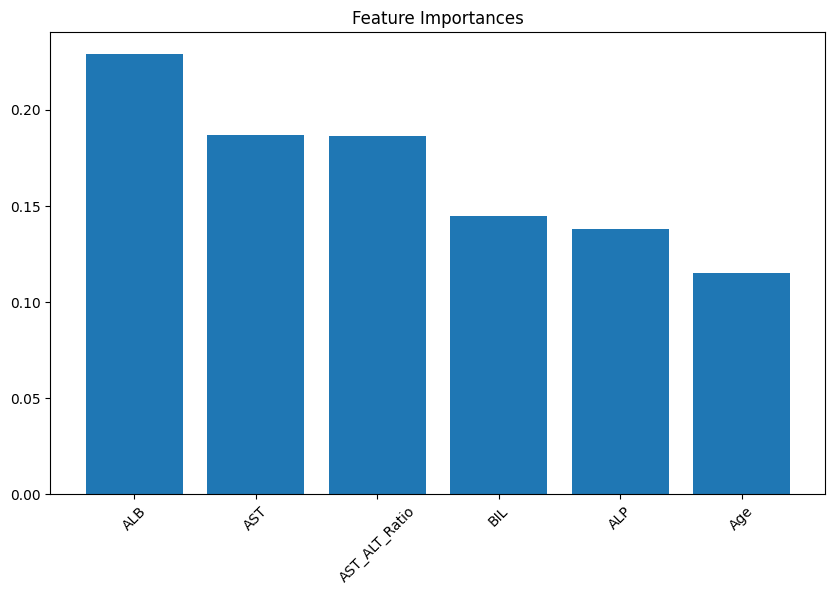

In [21]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = [selected_features[i] for i in indices]

plt.figure(figsize=(10,6))
plt.title('Feature Importances')
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), feature_names, rotation=45)
plt.show()


In [22]:
# Eğitim seti performansı
y_train_pred = rf.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)

# Test seti performansı
test_acc = accuracy_score(y_test, y_pred)

print(f"Train Accuracy: {train_acc}")
print(f"Test Accuracy: {test_acc}")


Train Accuracy: 1.0
Test Accuracy: 0.9906191369606003


In [23]:
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean()}")


Cross-validation scores: [0.95934959 0.93495935 0.95121951 0.91056911 0.92682927]
Mean CV accuracy: 0.9365853658536587


In [24]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X, y)

print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf

In [25]:
# 2️⃣ Normalizasyon
import joblib

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

joblib.dump(scaler, 'HCV600_scaler.pkl')


['HCV600_scaler.pkl']

In [26]:
X

,ALB,AST,ALP,BIL,Age,AST_ALT_Ratio
0,38.5,22.1,52.50000,7.5,32,2.870130
1,38.5,24.7,70.30000,3.9,32,1.372222
2,46.9,52.6,74.70000,6.1,32,1.453039
3,43.2,22.6,52.00000,18.9,32,0.738562
4,39.2,24.8,74.10000,9.6,32,0.760736
...,...,...,...,...,...,...
610,32.0,110.3,416.60000,50.0,62,18.694915
611,24.0,44.4,102.80000,20.0,64,15.310345
612,29.0,99.0,87.30000,48.0,64,28.285714
613,33.0,62.0,68.28392,20.0,46,1.589744


In [27]:
df.head()

,0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,AST_ALT_Ratio
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,2.870130
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,1.372222
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,1.453039
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0.738562
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0.760736


Test Accuracy: 0.9681
Train Accuracy: 1.0000

Classification Report (Test Set):
                        precision    recall  f1-score   support

         0=Blood Donor       0.96      0.94      0.95       113
0s=suspect Blood Donor       0.98      1.00      0.99       116
           1=Hepatitis       0.94      0.95      0.95       100
            2=Fibrosis       0.96      0.97      0.97       107
           3=Cirrhosis       0.99      0.98      0.98        97

              accuracy                           0.97       533
             macro avg       0.97      0.97      0.97       533
          weighted avg       0.97      0.97      0.97       533



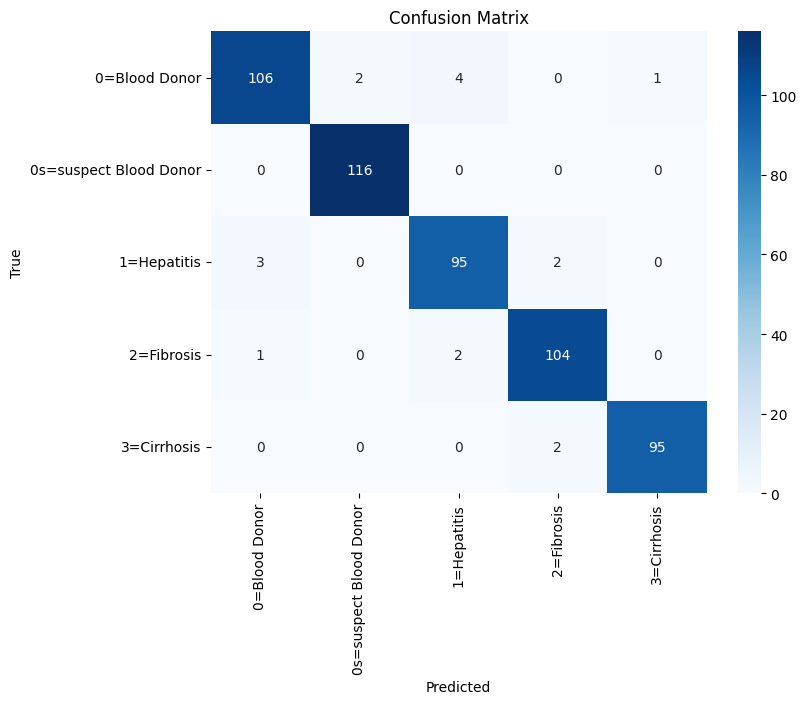

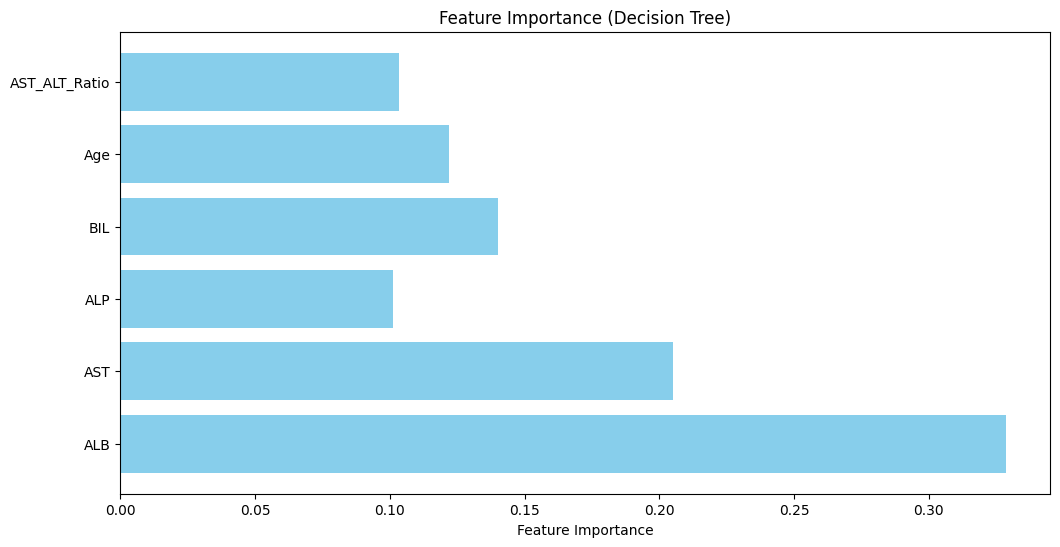

In [28]:
# 1. Modeli oluşturma
dt = DecisionTreeClassifier(random_state=42)

# 2. Modeli eğitme
dt.fit(X_train, y_train)

# 3. Test verisi üzerinde tahmin yapma
y_pred = dt.predict(X_test)

# 4. Model performansını değerlendirme

# Test seti doğruluğu
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Eğitim seti doğruluğu
y_train_pred = dt.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Train Accuracy: {train_accuracy:.4f}")

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred))

# 5. Confusion Matrix görselleştirme
# Sınıf isimlerini tanımlıyoruz (bunu datasetinize göre ayarlayın)
class_names = ['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis']

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# 6. Feature Importance grafiği
feature_importance = dt.feature_importances_
plt.figure(figsize=(12, 6))
plt.barh(X.columns, feature_importance, color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Feature Importance (Decision Tree)")
plt.show()


In [29]:
cv_scores = cross_val_score(dt, X, y, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean()}")


Cross-validation scores: [0.92682927 0.91869919 0.91056911 0.91056911 0.91869919]
Mean CV accuracy: 0.9170731707317075


Bu sonuçlar, modelin doğruluğunun oldukça istikrarlı olduğunu ve genelleme yeteneğinin iyi olduğunu gösteriyor. Cross-validation sonuçları, modelin yeni veriler üzerinde aşırı uyum yapmadığını ve genel performansının test verisi üzerinde tutarlı olduğunu ortaya koyuyor.

Sonuç olarak, aşırı uyum riski oldukça düşük. Modelin genelleme yeteneği oldukça sağlam görünüyor.

Support Vector Machine

In [30]:
X

,ALB,AST,ALP,BIL,Age,AST_ALT_Ratio
0,38.5,22.1,52.50000,7.5,32,2.870130
1,38.5,24.7,70.30000,3.9,32,1.372222
2,46.9,52.6,74.70000,6.1,32,1.453039
3,43.2,22.6,52.00000,18.9,32,0.738562
4,39.2,24.8,74.10000,9.6,32,0.760736
...,...,...,...,...,...,...
610,32.0,110.3,416.60000,50.0,62,18.694915
611,24.0,44.4,102.80000,20.0,64,15.310345
612,29.0,99.0,87.30000,48.0,64,28.285714
613,33.0,62.0,68.28392,20.0,46,1.589744


In [45]:
# Özellikler ve hedef değişkeni ayıralım
X = df[selected_features]  # Kullanılacak özellikler
y = df['Category']  # Hedef değişken (Category)


In [46]:
X

,ALB,AST,ALP,BIL,Age,AST_ALT_Ratio
0,38.5,22.1,52.50000,7.5,32,2.870130
1,38.5,24.7,70.30000,3.9,32,1.372222
2,46.9,52.6,74.70000,6.1,32,1.453039
3,43.2,22.6,52.00000,18.9,32,0.738562
4,39.2,24.8,74.10000,9.6,32,0.760736
...,...,...,...,...,...,...
610,32.0,110.3,416.60000,50.0,62,18.694915
611,24.0,44.4,102.80000,20.0,64,15.310345
612,29.0,99.0,87.30000,48.0,64,28.285714
613,33.0,62.0,68.28392,20.0,46,1.589744


In [33]:
# SMOTE kullanarak dengesizliği düzeltme
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
"""X=X_resampled
y=y_resampled"""

In [40]:
y

0       0=Blood Donor
1       0=Blood Donor
2       0=Blood Donor
3       0=Blood Donor
4       0=Blood Donor
            ...      
2660      3=Cirrhosis
2661      3=Cirrhosis
2662      3=Cirrhosis
2663      3=Cirrhosis
2664      3=Cirrhosis
Name: Category, Length: 2665, dtype: object

In [42]:
y_pred


array(['1=Hepatitis', '3=Cirrhosis', '0=Blood Donor', '1=Hepatitis',
       '2=Fibrosis', '2=Fibrosis', '2=Fibrosis', '0s=suspect Blood Donor',
       '0=Blood Donor', '1=Hepatitis', '2=Fibrosis', '2=Fibrosis',
       '1=Hepatitis', '0s=suspect Blood Donor', '1=Hepatitis',
       '0=Blood Donor', '2=Fibrosis', '2=Fibrosis', '3=Cirrhosis',
       '2=Fibrosis', '0s=suspect Blood Donor', '3=Cirrhosis',
       '3=Cirrhosis', '3=Cirrhosis', '1=Hepatitis',
       '0s=suspect Blood Donor', '0s=suspect Blood Donor', '2=Fibrosis',
       '0s=suspect Blood Donor', '1=Hepatitis', '0=Blood Donor',
       '1=Hepatitis', '3=Cirrhosis', '0=Blood Donor',
       '0s=suspect Blood Donor', '0=Blood Donor', '1=Hepatitis',
       '2=Fibrosis', '1=Hepatitis', '0=Blood Donor', '3=Cirrhosis',
       '0s=suspect Blood Donor', '0s=suspect Blood Donor', '2=Fibrosis',
       '0=Blood Donor', '3=Cirrhosis', '1=Hepatitis', '3=Cirrhosis',
       '0s=suspect Blood Donor', '2=Fibrosis', '0=Blood Donor',
       '3=Cirr

In [44]:
X_scaled.shape

(2665, 6)

Train Accuracy: 0.9235
Test Accuracy: 0.9268

Classification Report:
                        precision    recall  f1-score   support

         0=Blood Donor       1.00      0.94      0.97        96
0s=suspect Blood Donor       0.75      1.00      0.86         3
           1=Hepatitis       0.62      0.89      0.73         9
            2=Fibrosis       0.67      1.00      0.80         6
           3=Cirrhosis       1.00      0.78      0.88         9

              accuracy                           0.93       123
             macro avg       0.81      0.92      0.85       123
          weighted avg       0.95      0.93      0.93       123



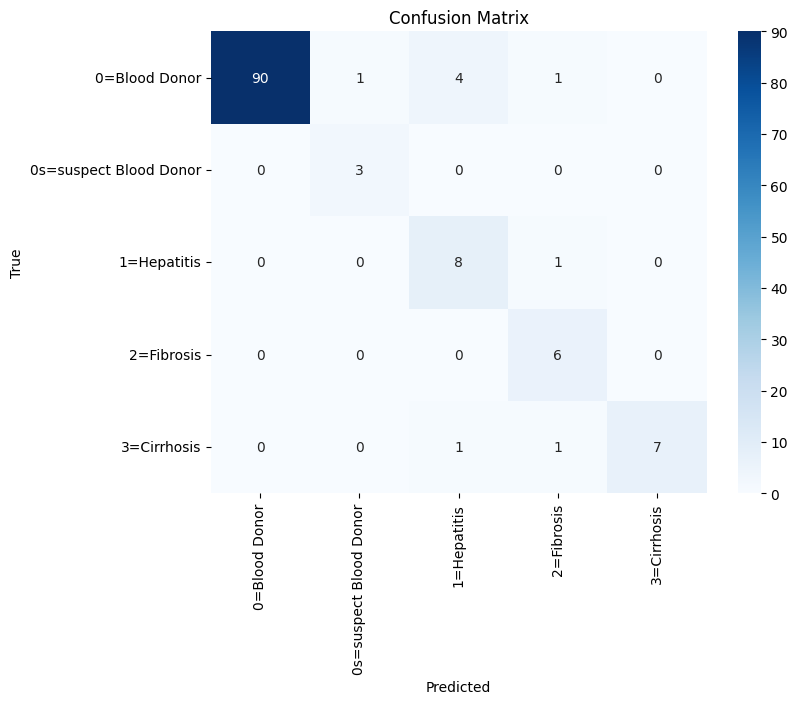

In [48]:
# Veri hazırlığı: Veriyi standartlaştırma
from sklearn.svm import SVC


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
joblib.dump(scaler, 'HCV600_scaler.pkl')

# Eğitim ve test setine ayırma
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_scaled, y)
# SVM modelini oluşturma
svm = SVC(random_state=42, kernel='rbf', C=1, gamma='scale')  # kernel='rbf' (Radial Basis Function) kullanıyoruz

# Modeli eğitme
svm.fit(X_train, y_train)
joblib.dump(svm, 'HCV600_svm_model.pkl')
# Test seti üzerinde tahmin yapma
y_pred = svm.predict(X_test)


# Eğitim seti doğruluğu
y_train_pred = svm.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Train Accuracy: {train_accuracy:.4f}")


# Performans değerlendirmesi
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix görselleştirme
class_names = ['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis']
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters: {'C': 100, 'degree': 3, 'gamma': 1, 'kernel': 'rbf'}
Train Accuracy: 0.9986
Test Accuracy: 0.9869

Classification Report:
                        precision    recall  f1-score   support

         0=Blood Donor       1.00      0.97      0.99       113
0s=suspect Blood Donor       0.99      1.00      1.00       116
           1=Hepatitis       1.00      0.98      0.99       100
            2=Fibrosis       0.96      0.99      0.98       107
           3=Cirrhosis       0.98      0.99      0.98        97

              accuracy                           0.99       533
             macro avg       0.99      0.99      0.99       533
          weighted avg       0.99      0.99      0.99       533



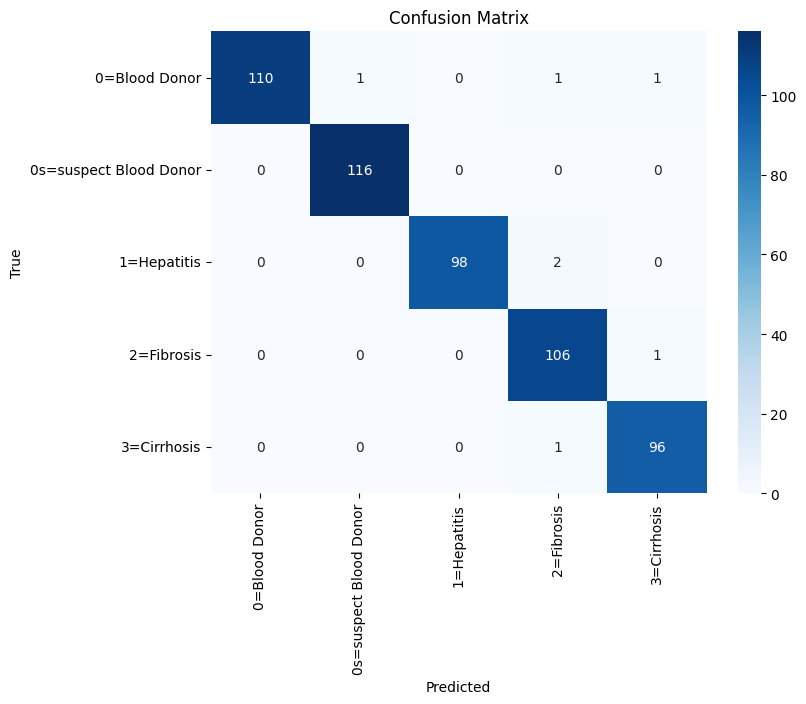

In [36]:
from sklearn.model_selection import GridSearchCV

# SVM modelini tanımlıyoruz
svm = SVC(random_state=42)

# Hyperparameter gridini tanımlıyoruz
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parametresi
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel türleri
    'gamma': ['scale', 'auto', 0.1, 1],  # Gamma seçenekleri
    'degree': [3, 4, 5]  # Polinomial kernel için derece
}

# GridSearchCV ile hyperparameter tuning
grid_search = GridSearchCV(svm, param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# En iyi parametreleri yazdırıyoruz
print("Best parameters:", grid_search.best_params_)

# En iyi modelin performansını yazdırıyoruz
best_svm = grid_search.best_estimator_

# Test setinde tahmin yapıyoruz
y_pred = best_svm.predict(X_test)


# Eğitim seti doğruluğu
y_train_pred = best_svm.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Train Accuracy: {train_accuracy:.4f}")


# Performans raporunu yazdırıyoruz
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix görselleştirme
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


Hyperparameter tuning sonucunda SVM modeli, en iyi parametre kombinasyonu olan C=100, degree=3, gamma=1, ve kernel='rbf' ile daha iyi sonuçlar elde etti.

SVM ile elde edilen sonuçlar başarılı ve overfitting şüphesi taşımıyor, çünkü test doğruluğu oldukça yüksek.

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/home/sercan/Genel/cse/backend/venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/sercan/Genel/cse/backend/venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/sercan/Genel/cse/backend/venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/sercan/Genel/cse/backend/venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/sercan/Genel/cse/backend/venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best parameters for Logistic Regression: {'C': 100, 'max_iter': 300, 'solver': 'saga'}
Train Accuracy (Logistic Regression): 0.8588
Test Accuracy (Logistic Regression): 0.8480

Classification Report (Logistic Regression):
                        precision    recall  f1-score   support

         0=Blood Donor       0.84      0.90      0.87       113
0s=suspect Blood Donor       0.98      1.00      0.99       116
           1=Hepatitis       0.76      0.78      0.77       100
            2=Fibrosis       0.71      0.68      0.70       107
           3=Cirrhosis       0.95      0.86      0.90        97

              accuracy                           0.85       533
             macro avg       0.85      0.84      0.85       533
          weighted avg       0.85      0.85      0.85       533



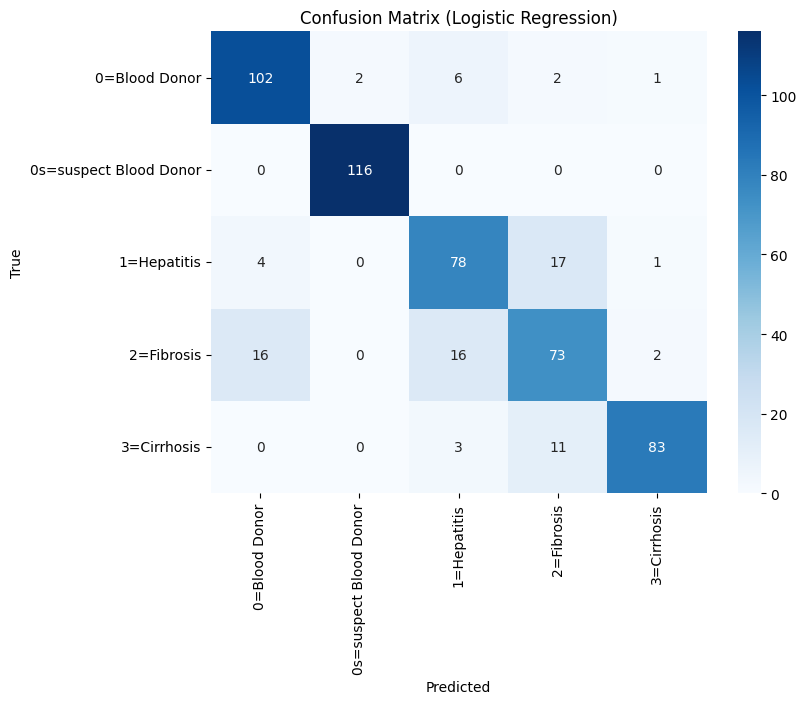

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Logistic Regression modelini tanımlıyoruz
log_reg = LogisticRegression(random_state=42)

# Hyperparameter gridini tanımlıyoruz
param_grid_lr = {
    'C': [0.1, 1, 10, 100],  # Regularization parametresi
    'solver': ['liblinear', 'lbfgs', 'saga'],  # Çözümleme algoritmaları
    'max_iter': [100, 200, 300]  # Maksimum iterasyon sayısı
}

# GridSearchCV ile hyperparameter tuning
grid_search_lr = GridSearchCV(log_reg, param_grid_lr, cv=5, n_jobs=-1, scoring='accuracy', verbose=1)
grid_search_lr.fit(X_train, y_train)

# En iyi parametreleri yazdırıyoruz
print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)

# En iyi modelin performansını yazdırıyoruz
best_log_reg = grid_search_lr.best_estimator_

# Test setinde tahmin yapıyoruz
y_pred_lr = best_log_reg.predict(X_test)

# Eğitim seti doğruluğu
y_train_pred_lr = best_log_reg.predict(X_train)
train_accuracy_lr = accuracy_score(y_train, y_train_pred_lr)
print(f"Train Accuracy (Logistic Regression): {train_accuracy_lr:.4f}")

# Performans raporunu yazdırıyoruz
print(f"Test Accuracy (Logistic Regression): {accuracy_score(y_test, y_pred_lr):.4f}")
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_lr))

# Confusion Matrix görselleştirme
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix (Logistic Regression)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [38]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder tanımlıyoruz
le = LabelEncoder()

# y_train ve y_test'i sayısal değerlere dönüştürüyoruz
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)


In [39]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 2️⃣ XGBoost sınıflandırıcıyı tanımlıyoruz
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# 3️⃣ Hyperparameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# 4️⃣ GridSearchCV ile tuning
grid_search = GridSearchCV(xgb_clf, param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train_enc)

# 5️⃣ En iyi parametreleri yazdırıyoruz
print("Best parameters for XGBoost:", grid_search.best_params_)

# 6️⃣ En iyi modeli alıyoruz
best_xgb = grid_search.best_estimator_

# 7️⃣ Eğitim ve test tahminleri
y_train_pred = best_xgb.predict(X_train)
y_test_pred = best_xgb.predict(X_test)

# 8️⃣ Doğruluk skorları
train_accuracy = accuracy_score(y_train_enc, y_train_pred)
test_accuracy = accuracy_score(y_test_enc, y_test_pred)

print(f"Train Accuracy (XGBoost): {train_accuracy:.4f}")
print(f"Test Accuracy (XGBoost): {test_accuracy:.4f}")

# 9️⃣ Classification report (orijinal etiketlerle)
print("\nClassification Report (XGBoost):")
print(classification_report(y_test, le.inverse_transform(y_test_pred)))

# 🔟 Confusion Matrix görselleştirme
cm = confusion_matrix(y_test_enc, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix (XGBoost)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


ModuleNotFoundError: No module named 'xgboost'

In [ ]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder tanımla
le = LabelEncoder()
y_num = le.fit_transform(y)

# Dönüştürülmüş sınıfları gör
print("Encoded classes:", list(le.classes_))


Encoded classes: ['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis']


In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validation
cv_scores = cross_val_score(best_xgb, X, y_num, cv=5, scoring='accuracy' )

# Sonuçları yazdır
print("Cross-validation scores:", cv_scores)
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")


C:\Users\suygu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [00:08:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\suygu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [00:08:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\suygu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarnin

Cross-validation scores: [0.96810507 0.97560976 0.98499062 0.99249531 0.9793621 ]
Mean CV Accuracy: 0.9801
Standard Deviation: 0.0083


XGBOOST overfitting olma ihtimali taşıyor.

In [ ]:
df

,0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,AST_ALT_Ratio
0,1,0=Blood Donor,32,m,38.5,52.50000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,2.870130
1,2,0=Blood Donor,32,m,38.5,70.30000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,1.372222
2,3,0=Blood Donor,32,m,46.9,74.70000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,1.453039
3,4,0=Blood Donor,32,m,43.2,52.00000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0.738562
4,5,0=Blood Donor,32,m,39.2,74.10000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0.760736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.60000,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,18.694915
611,612,3=Cirrhosis,64,f,24.0,102.80000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,15.310345
612,613,3=Cirrhosis,64,f,29.0,87.30000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,28.285714
613,614,3=Cirrhosis,46,f,33.0,68.28392,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,1.589744


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Veri setini yükleme
data = pd.read_csv("hcvdat0.csv")

# Özellikler (X) ve etiketler (y) ayırma
X = df[selected_features]  # 'label_column' gerçek etiket sütunu adı ile değiştirilmelidir
y = df["Category"]

# Etiketlerin sayısal hale getirilmesi (Label Encoding)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Eğitim ve test verilerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


C:\Users\suygu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\suygu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
17 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
13 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\suygu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8

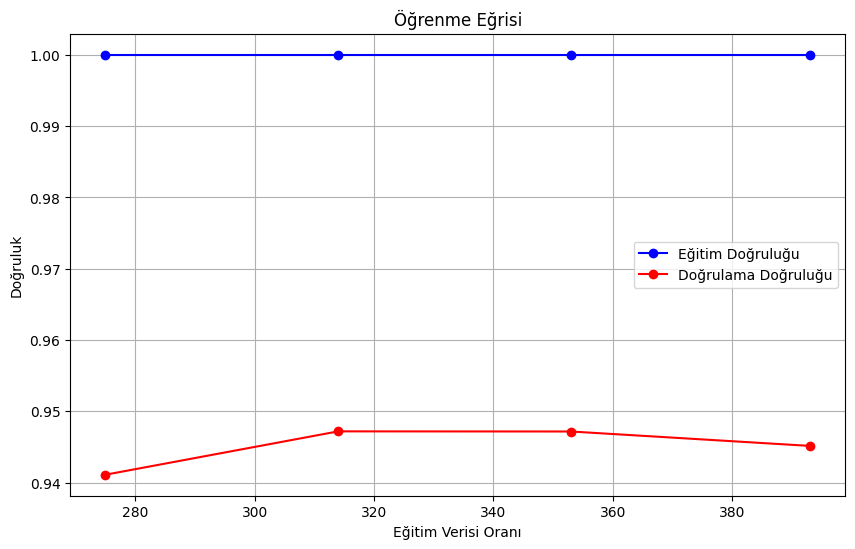

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import xgboost as xgb

# Modeli seçme
model = xgb.XGBClassifier(random_state=42)

# Öğrenme eğrisini hesaplama
train_sizes, train_scores, val_scores = learning_curve(
    model, X_train, y_train, cv=5, n_jobs=-1, train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
)

# Eğitim ve doğrulama doğruluklarının ortalamalarını hesaplama
train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

# Öğrenme eğrisinin çizilmesi
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Eğitim Doğruluğu", color="blue", marker="o")
plt.plot(train_sizes, val_mean, label="Doğrulama Doğruluğu", color="red", marker="o")
plt.title("Öğrenme Eğrisi")
plt.xlabel("Eğitim Verisi Oranı")
plt.ylabel("Doğruluk")
plt.legend(loc="best")
plt.grid(True)
plt.show()
